# LINEAR REGRESSION ON GAPMINDER DATASET

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null fl

/Users/abinphilip/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/abinphilip/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


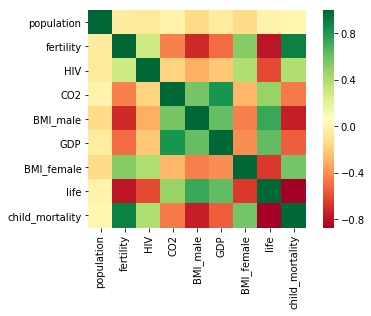

[ 82.95721362] + [[-4.44387899]] X
R^2error 0.619244216774
RMSE error 5.60860019139


In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

#EXPLORING THE DATASET
gp=pd.read_csv('gm_2008_region.csv')
print(gp.head())
print(gp.info())
print(gp.describe())
sns.heatmap(gp.corr(), square=True, cmap='RdYlGn')

#SELECTING INPUT AND TARGET
X=gp['fertility']
y=gp['life']



#RESHAPING THE DATA
X=X.reshape(-1,1)
y=y.reshape(-1,1)

#INTIATING LINEAR REGRESSION AND FITTING THE MODEL
reg=LinearRegression()
reg.fit(X,y)

#PREDICT NEW TARGET UPON INPUT
ynew=reg.predict(X)

#PLOT THE FIT ON DATA
plt.scatter(X,y,color='blue')
plt.plot(X,ynew,'-')
plt.show()

#PRINT THE MODEL AND SCORE

print(reg.intercept_,"+",reg.coef_,"X")
print("R^2error",reg.score(X,y))
print("RMSE error",np.sqrt(mean_squared_error(y,ynew)))

# MULTIPLE REGRESSION ON GAPMINDER DATASET

In [74]:
#MULTI LINEAR REGRESSION

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error



gp=pd.read_csv('gm_2008_region.csv')

#SELECTING INPUT AND TARGET
X=gp[['child_mortality','fertility','HIV','BMI_male','BMI_female']]
y=gp[['life']]



#RESHAPING THE DATA
#X=X.reshape(-1,1)
#y=y.reshape(-1,1)

#INTIATING LINEAR REGRESSION AND FITTING THE MODEL
reg=LinearRegression()
reg.fit(X,y)

#PREDICT NEW TARGET UPON INPUT
ynew=reg.predict(X)



#PRINT THE MODEL AND SCORE

print(reg.intercept_,"+",reg.coef_,"X")
print("R^2error",reg.score(X,y))
print("RMSE error",np.sqrt(mean_squared_error(y,ynew)))

[ 99.88382669] + [[-0.10155911 -0.29668521 -0.57667217  0.65063487 -0.31353348]] X
R^2error 0.871399832091
RMSE error 3.25950758537


# RIDGE REGRESSION ON GAPMINDER

[[-0.05575342 -1.02675002 -0.47495512  0.73039823 -0.33517292]]


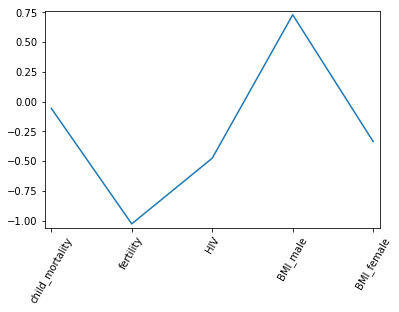

[ 100.59493612] + [[-0.05575342 -1.02675002 -0.47495512  0.73039823 -0.33517292]] X
R^2error 0.852686149988
RMSE error 3.48861479401


In [84]:
#RIDGE REGRESSION 

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge


gp=pd.read_csv('gm_2008_region.csv')


#SELECTING INPUT AND TARGET
X=gp[['child_mortality','fertility','HIV','BMI_male','BMI_female']]
y=gp[['life']]





#INTIATING LINEAR REGRESSION AND FITTING THE MODEL
reg = Ridge(alpha=.4,normalize=True) #TRY DIFF ALPHAS
reg.fit(X,y)

coef=reg.fit(X,y).coef_
print(coef)

#PREDICT NEW TARGET UPON INPUT
ynew=reg.predict(X)

plt.plot(range(len(X.columns)), coef.T)
plt.xticks(range(len(X.columns)), X, rotation=60)
plt.margins(0.02)
plt.show()




#PRINT THE MODEL AND SCORE
print(reg.intercept_,"+",reg.coef_,"X")
print("R^2error",reg.score(X,y))
print("RMSE error",np.sqrt(mean_squared_error(y,ynew)))

# LASSO REGRESSION ON GAPMINDER

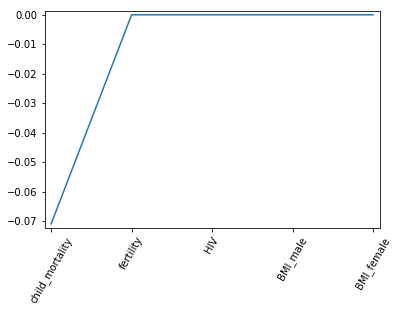

[ 72.79917526] + [-0.07087587 -0.         -0.          0.         -0.        ] X
R^2error 0.494863217343
RMSE error 6.4600477052


In [83]:
# LASSO REGRESSION

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso


gp=pd.read_csv('gm_2008_region.csv')


#SELECTING INPUT AND TARGET
X=gp[['child_mortality','fertility','HIV','BMI_male','BMI_female']]
y=gp[['life']]





#INTIATING LINEAR REGRESSION AND FITTING THE MODEL
reg = Lasso(alpha=.4, normalize=True)
reg.fit(X,y)

coef=reg.fit(X,y).coef_

#PREDICT NEW TARGET UPON INPUT
ynew=reg.predict(X)

plt.plot(range(len(X.columns)), coef)
plt.xticks(range(len(X.columns)), X, rotation=60)
plt.margins(0.02)
plt.show()




#PRINT THE MODEL AND SCORE
print(reg.intercept_,"+",reg.coef_,"X")
print("R^2error",reg.score(X,y))
print("RMSE error",np.sqrt(mean_squared_error(y,ynew)))